In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# df = pd.read_csv('/Users/kirtan/Downloads/fitness_class_2212 2.csv')
df = pd.read_csv('./dataset/problem2.csv')

In [75]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [76]:
df.shape

(1500, 8)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [78]:
df = df.drop(columns='booking_id', axis=1)

In [79]:
df.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [80]:
weight_mean = df['weight'].mean()
df['weight'].fillna(weight_mean, inplace=True)

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_44770/3710418883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(weight_mean, inplace=True)


In [81]:
df.isnull().sum()

months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [82]:
cat_col = []
num_col = []

In [83]:
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [84]:
for col in cat_col:
    print(f'{col} :', df[col].unique())

days_before : ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week : ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time : ['PM' 'AM']
category : ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [85]:
for i, element in enumerate(df['days_before']):
    df['days_before'][i] = element.replace('days', '')

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_44770/123237748.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['days_before'][i] = element.replace('days', '')
/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_4477

In [86]:
df['day_of_week'] = df['day_of_week'].replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].replace('Monday', 'Mon')

In [87]:
for col in cat_col:
    print(f'{col} :', df[col].unique())

days_before : ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 ' '20' '1' '15'
 '6 ' '11' '13 ' '3 ' '16' '1 ' '7 ' '8 ' '10 ' '14 ' '17' '5 ' '2 ' '4 '
 '29']
day_of_week : ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
time : ['PM' 'AM']
category : ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


# Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
label_encoding = {}

In [90]:
for col in cat_col:
    label_encoding[col] = LabelEncoder()
    df[col] = label_encoding[col].fit_transform(df[col])

In [91]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,28,6,1,4,0
1,10,79.01,14,1,0,3,0
2,16,74.53,9,3,0,4,0
3,5,86.12,2,0,0,2,0
4,15,69.29,28,4,0,3,0


# Data Visualization

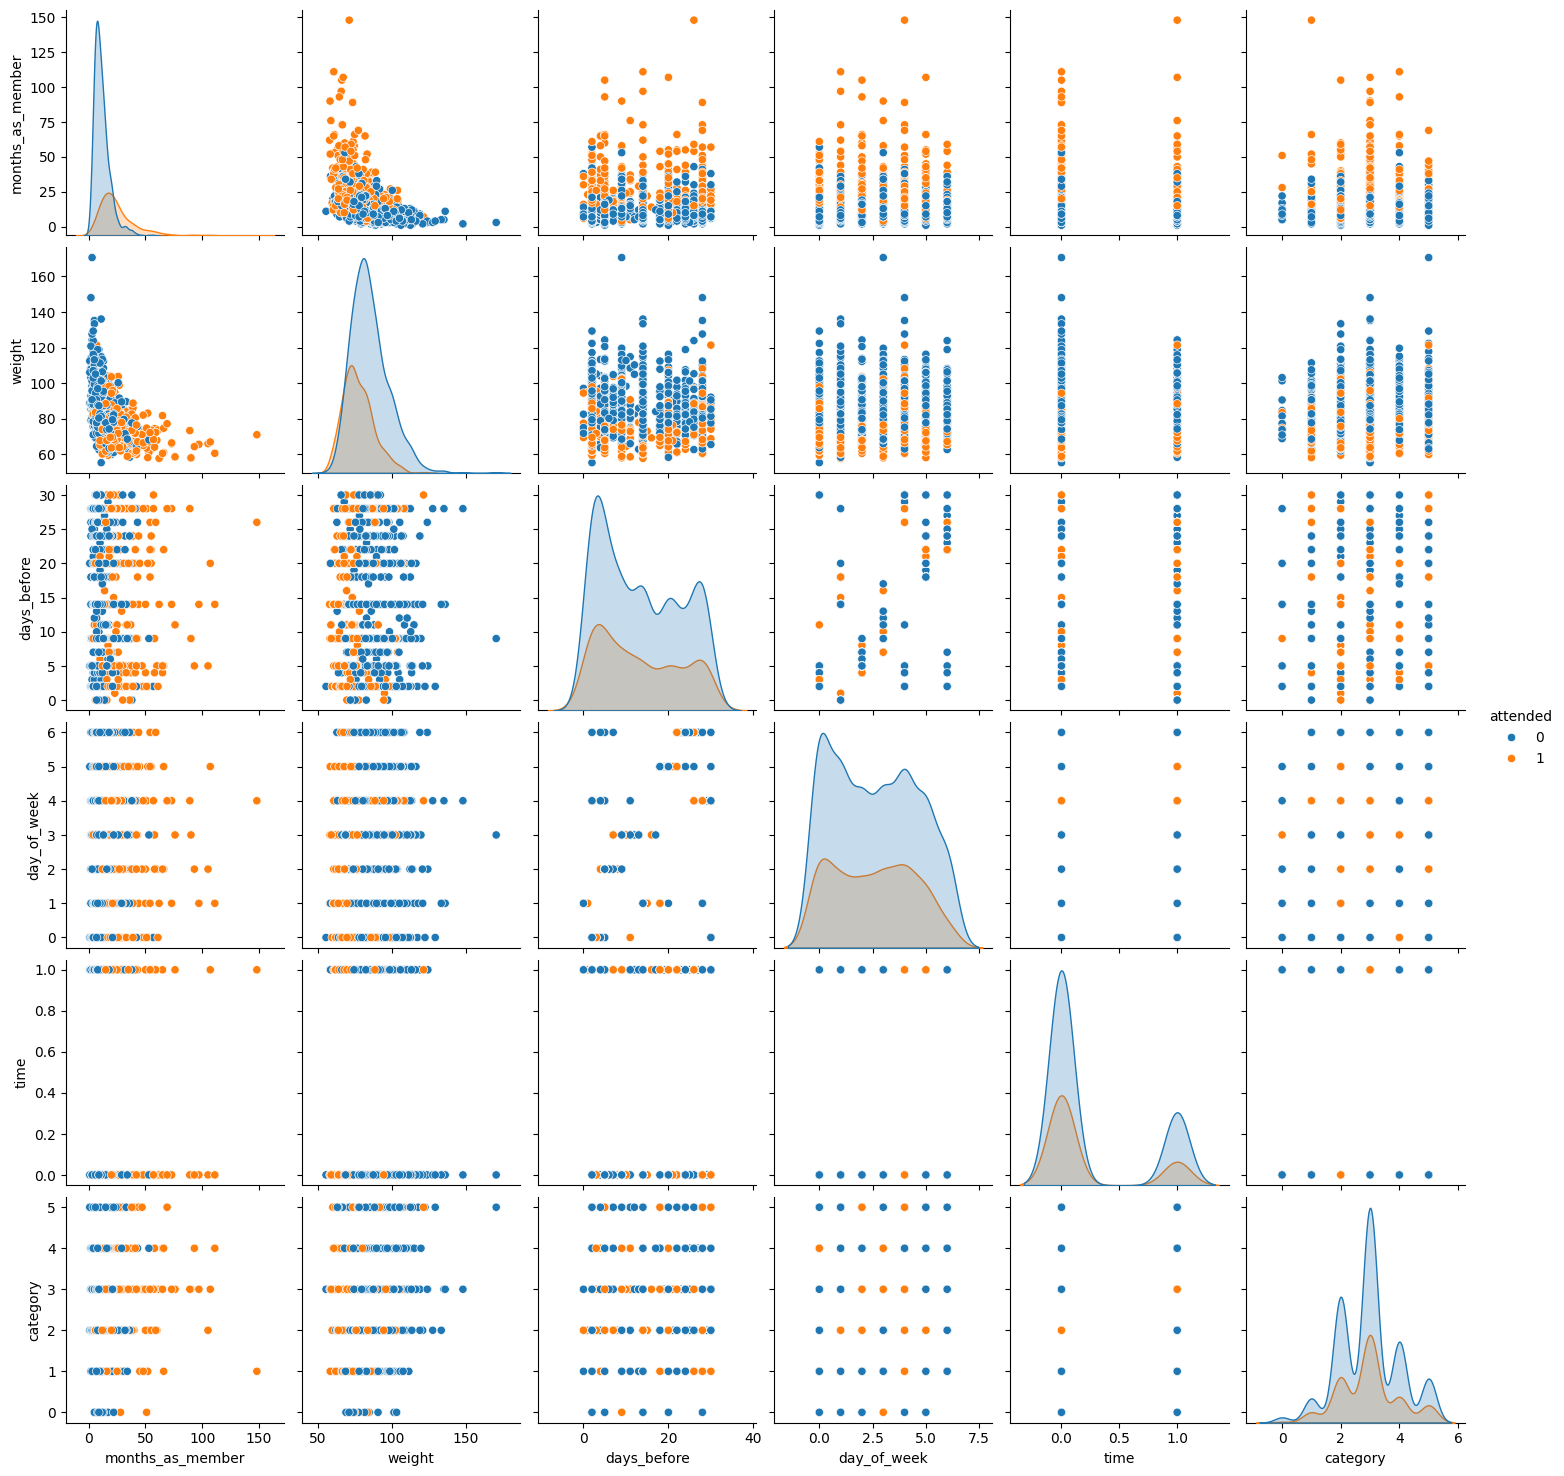

In [92]:
sns.pairplot(data=df, hue='attended')
plt.show()

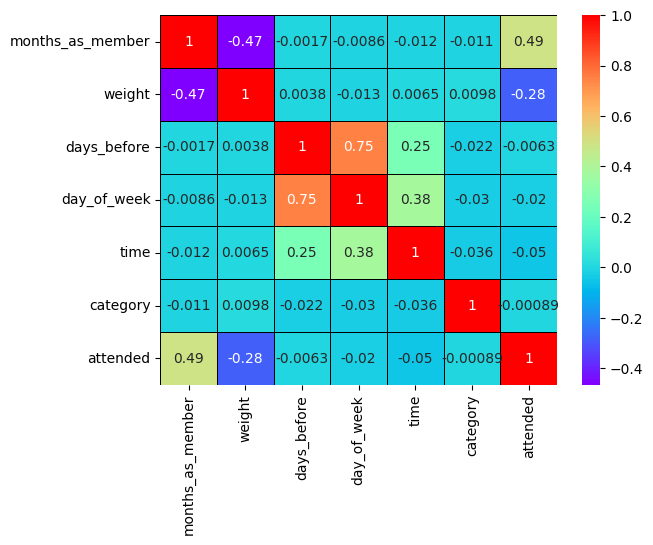

In [93]:
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linecolor='black', linewidths=0.5)
plt.show()

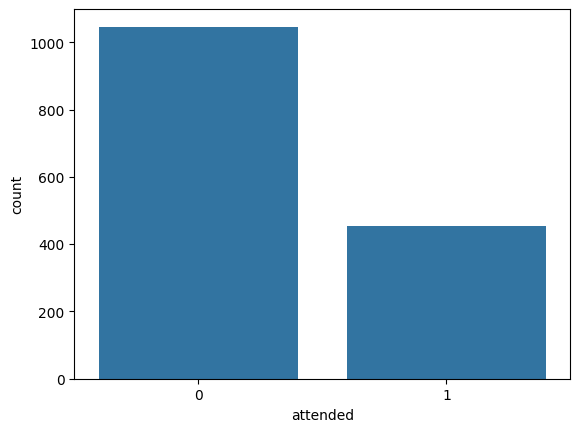

In [94]:
sns.countplot(data=df, x='attended')
plt.show()

# Train & Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.iloc[:,:-1]
X

,months_as_member,weight,days_before,day_of_week,time,category
0,17,79.56,28,6,1,4
1,10,79.01,14,1,0,3
2,16,74.53,9,3,0,4
3,5,86.12,2,0,0,2
4,15,69.29,28,4,0,3
...,...,...,...,...,...,...
1495,21,79.51,2,0,0,3
1496,29,89.55,14,1,0,4
1497,9,87.38,20,5,0,3
1498,34,68.64,9,3,0,1


In [97]:
y = df['attended']
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: int64

# Handling the class imbalance problem

In [98]:
from imblearn.over_sampling import RandomOverSampler

In [99]:
resamp = RandomOverSampler()

In [100]:
tempX, tempy = resamp.fit_resample(X, y)

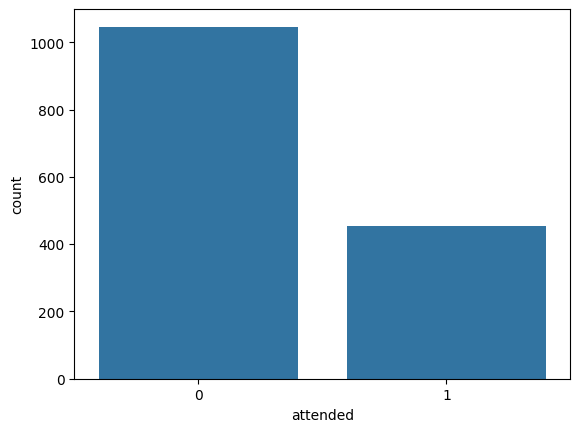

In [101]:
sns.countplot(data=df, x=y)
plt.show()

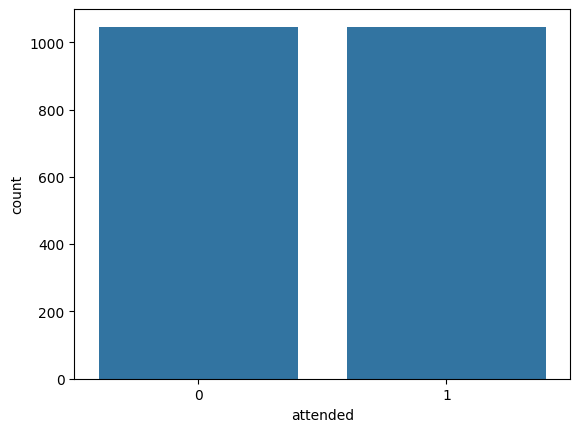

In [102]:
sns.countplot(data=df, x=tempy)
plt.show()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(tempX, tempy, test_size=0.2, random_state=0)

# Model

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RNF = RandomForestClassifier()

In [106]:
RNF.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
y_hat = RNF.predict(X_test)

# Model Evaluation

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [109]:
accuracy_score(y_test, y_hat)

0.8997613365155132

In [110]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       214
           1       0.86      0.95      0.90       205

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419



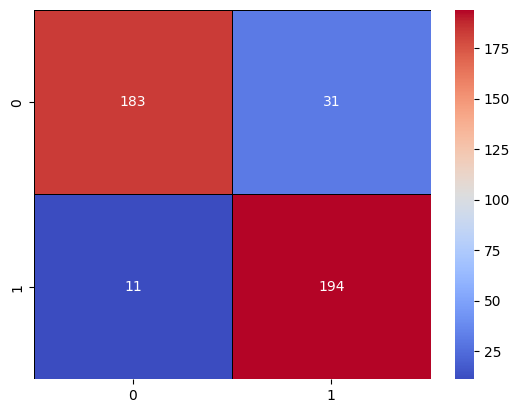

In [111]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', fmt='.3g',linecolor='black', annot=True, linewidths=0.5)
plt.show()